In [222]:
import requests
from tqdm.auto import tqdm
import pandas as pd
from collections import defaultdict
import datetime
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

In [193]:
sber = '3529'
page = 1
num_per_page = 100
moscow = 1
url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}&area={moscow}'

In [194]:
res = requests.get(url)
vacancies = res.json()
num_pages = vacancies.get('pages')
num_pages


20

In [195]:
vacancies = res.json()
num_pages = vacancies.get('pages')
vacancy_ids = [el.get('id') for el in vacancies.get('items')]

In [196]:
vacancies.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

In [197]:
#vacancies['items']

In [198]:
vacancies.get('found')

2098

In [199]:
#Скачиваем ID всех вакансии Сбера
all_vacancy_ids= []
for i in tqdm(range(vacancies.get('pages'))):
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}&area={moscow}'
    res = requests.get(url)
    vacancies = res.json()
    vacancy_ids = [el.get('id') for el in vacancies.get('items')]
    all_vacancy_ids.extend(vacancy_ids)

  0%|          | 0/20 [00:00<?, ?it/s]

In [200]:
len (all_vacancy_ids)

2000

In [201]:
vac_id = '43326020'
url = f'https://api.hh.ru/vacancies/{vac_id}'
res = requests.get(url)
vacancy = res.json()


In [202]:
#vacancy.keys()

In [203]:
# Задание вытащить все вакансии СБЕРа с ХХ (у апи есть ограничение в 2000, подумайте как его обойти)
# Вытащите все полные описания этих вакансий по запросу с https://api.hh.ru/vacancies/43326020 где 43326020 id вакансии
# Создайте аналогичный vacancy DataFrame только добавьте поле skills
# Переведите даты публикаций в datetime
# Постройте график опубликованных вакансий по датам
# Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
# Найдите те вакансии с использованием python, которые вам интересны
# Определите по полю skills какие навыки больше всего востребованы для этих вакансий, и
# Постройте график наиболее востребованных вакансий

In [273]:
# Формируем словарь со списками для колонок таблицы Vacancy (добавили поле Skills)
#tab_dict = {'Id':[],'Name':[],'Vacdescription':[],'Skills':[],'Published_at':[],'Created_at':[]}
tab_dict = defaultdict(list)
# Заполняем списки с помощью цикла
for item in tqdm (all_vacancy_ids):
    url = f'https://api.hh.ru/vacancies/{item}'
    res = requests.get(url)
    vacancy = res.json()
    tab_dict['Id'].append(vacancy['id'])
    tab_dict['Name'].append(vacancy['name'])
    tab_dict['Vacdescription'].append(vacancy['description'])
    skills = ', '.join([x.get('name')for x in vacancy.get('key_skills')])
    tab_dict['Skills'].append(skills)
    tab_dict['Published_at'].append(vacancy['published_at'])
    tab_dict['Created_at'].append(vacancy['created_at'])

  0%|          | 0/2000 [00:00<?, ?it/s]

In [470]:
df= pd.DataFrame.from_dict(tab_dict)
df.head()

,Id,Name,Vacdescription,Skills,Published_at,Created_at
0,46380141,Клиентский менеджер внешней дистрибуции (Прямы...,"<p>Хочешь работать в банке, но офисная рутина ...","Активные продажи, Работа в команде, Навыки про...",2021-10-14T14:48:43+0300,2021-10-14T14:48:43+0300
1,46943947,Клиентский менеджер прямых продаж,<p>У каждого нашего зарплатного клиента – комп...,,2021-10-11T11:10:21+0300,2021-10-11T11:10:21+0300
2,48160324,Менеджер службы заботы,<p>Cлужба заботы F1 отвечает за оперативную по...,"Грамотная речь, Работа в команде, Деловое обще...",2021-10-19T15:28:19+0300,2021-10-19T15:28:19+0300
3,48419849,Администратор зала,<p><strong>Обязанности:</strong></p> <ul> <li>...,,2021-09-30T19:22:35+0300,2021-09-30T19:22:35+0300
4,44951547,Клиентский менеджер,"<p>Клиентский менеджер ― специалист, который п...","Активные продажи, Прямые продажи",2021-10-06T20:09:35+0300,2021-10-06T20:09:35+0300


In [471]:
#Переводим даты публикаций в datetime
df.Published_at = pd.to_datetime(df.Published_at).dt.date #(и убрали из колонки время)
#df.Published_at

In [456]:
#Поменяли формат даты
#df1=df.Published_at.apply(lambda x:x.strftime("%m.%Y"))

In [68]:
#df.Published_at.dt.strftime('%d.%m.%Y') - 2 вариант

Text(0, 0.5, 'Количество вакансий')

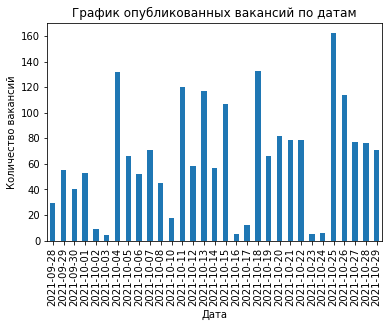

In [472]:
# Постройте график опубликованных вакансий по датам
df.set_index('Published_at')
df.groupby('Published_at')['Id'].count().plot(kind='bar')
plt.title('График опубликованных вакансий по датам')
plt.xlabel('Дата')
plt.ylabel('Количество вакансий')

In [473]:
# Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
#df.reset_index()
df['Weekday']=df.Published_at.apply(lambda x: x.strftime('%A'))
df.groupby('Weekday')['Id'].count().sort_values(ascending=False)

Weekday
Monday       547
Wednesday    383
Friday       355
Tuesday      333
Thursday     323
Sunday        40
Saturday      19
Name: Id, dtype: int64

Вывод: больше всего опубликовано вакансий в понедельник.

In [474]:
# Найдите те вакансии с использованием python, которые вам интересны
cols = ['Name','Vacdescription','Published_at','Skills'] 

vacs = df[df.Name.str.lower().str.contains('аналитик данных')|
       df.Name.str.lower().str.contains('data analyst')&
       df.Vacdescription.str.lower().str.contains('обучение')&
       df.Vacdescription.str.lower().str.contains('python')][cols]

vacs.shape


(17, 4)

Вывод: по заявленным фильтрам найдено 17 вакансий

In [475]:
# Определите по полю skills какие навыки больше всего востребованы для этих вакансий

vacs1=vacs['Skills'].tolist()# преобразовали данные колонки Skills в один общий список
vacs1=''.join(vacs1)#соединили все элементы списка в одну строку
#print(type(vacs1)) - тип данных - строка
from collections import Counter
c =Counter(w for w in vacs1.split(',')).most_common(3) #в полученной строке считаем повторяющиеся элементы, выводим топ 3 Skills
c

[(' SQL', 10), (' Python', 3), (' Анализ данных', 3)]

Вывод: топ 3 навыков, которые больше всего востребованы для вакансий, которые мне интересны: SQL, Python, Анализ данных.

In [476]:
# Постройте график наиболее востребованных вакансий
vacs2 = df.groupby('Name')['Id'].count().reset_index()
vacs2.sort_values(by='Id',ascending=False, inplace = True)
vacs2.head()

,Name,Id
1470,Системный аналитик,36
161,DevOps инженер,15
335,Java-разработчик,13
307,Java разработчик,12
224,Frontend-разработчик,10


Text(0, 0.5, 'Количество вакансий')

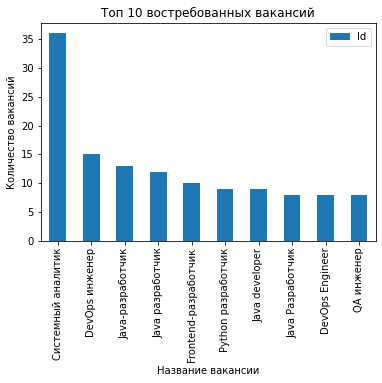

In [477]:
vacs2.nlargest(10, 'Id').set_index('Name').plot(kind='bar')#10 наиболее востребованных вакансий
plt.title('Топ 10 востребованных вакансий')
plt.xlabel('Название вакансии')
plt.ylabel('Количество вакансий')